### Load model mechanisms

In [1]:
modelPath = 'Models/LiCleland2013'
modelName = 'LiCleland2013'

def getSomaScript(h):
    
    h.load_file("nrngui.hoc")
    h.xopen("tabchannels.hoc")
    h.load_file("MC_def.hoc")         
    h.celsius = 35 
    h.v_init = -68.9
    
    h("objref cell")
    h("cell = new Mitral(0.0)")
    
    soma = h.cell.soma
    
    return soma

### Create a NeuronUnit model

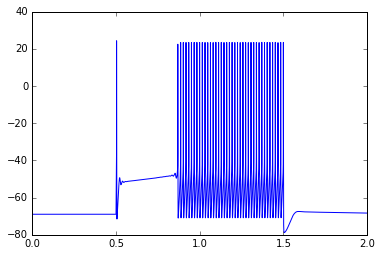

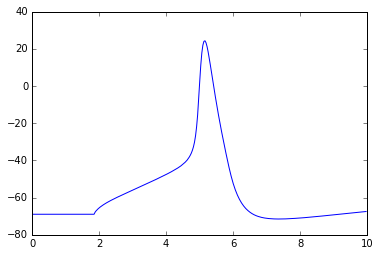

In [2]:
%matplotlib inline
import helpers

mod1 = helpers.createModel(name = modelName, \
                           path = modelPath, \
               getSectionScript = getSomaScript)

mod1.setIntegrationMethod("variable")

# Interactively find stimulation currents
helpers.IClampWidget(mod1)

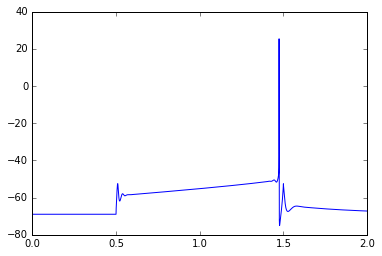

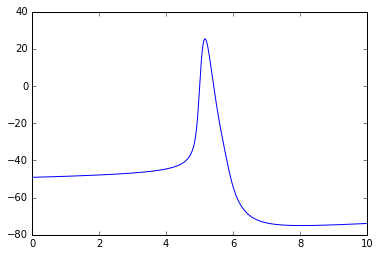

In [4]:
helpers.IClampWidget(mod1)

In [5]:
from quantities import nA, s, ms

# Set currents
i_rest =    {'amplitude':     0*nA, 'delay': 0.5*s, 'duration': 1*s}
i_passive = {'amplitude':  -0.2*nA, 'delay': 0.5*s, 'duration': 1*s}
i_ap  =     {'amplitude':     3*nA, 'delay': 0.5*s, 'duration': 1*ms}
i_thresh =  {'amplitude':  0.28*nA, 'delay': 0.5*s, 'duration': 1000*ms}

### Define tests to run

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -68.9550551157 mV, Z: -0.467737740664 SDs


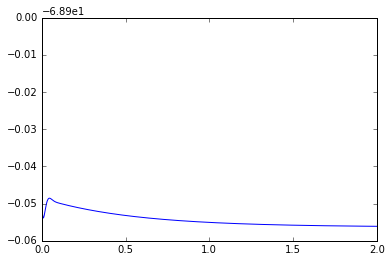

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -68.9550551157 mV, Z: -0.467737740664 SDs


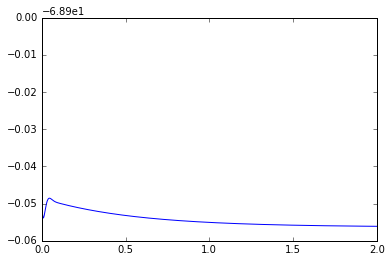

----------
Running Test: Input resistance test
Expected: 145113133.641 ohm +/- 189410293.868 ohm SD
Actual: 230686567.796 kg*m**2/(s**3*A**2), Z: 0.451788719652 SDs


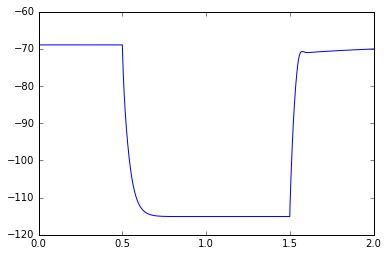

----------
Running Test: Time constant test
Expected: 27.9651006711 ms +/- 66.3591805191 ms SD
Actual: 41.7034119939 ms, Z: 0.207029550625 SDs


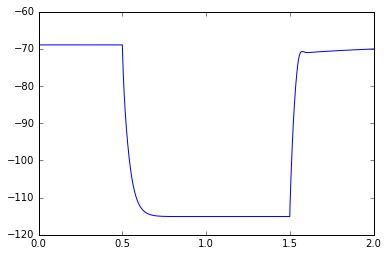

----------
Running Test: Injected current AP width test
Expected: 1.513125 ms +/- 0.961592715477 ms SD
Actual: 0.775 ms, Z: -0.767606688486 SDs


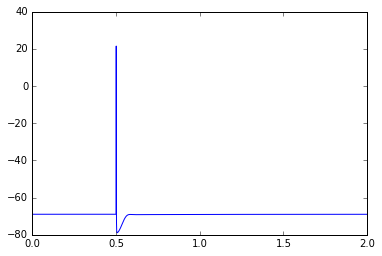

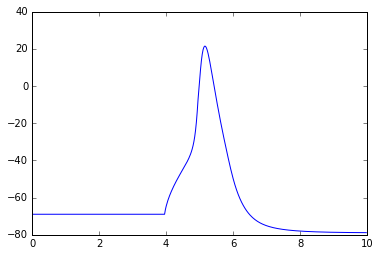

----------
Running Test: Injected current AP threshold test
Expected: -34.6053571429 mV +/- 56.7790487536 mV SD
Actual: -37.3021882326 mV, Z: -0.0474969403133 SDs


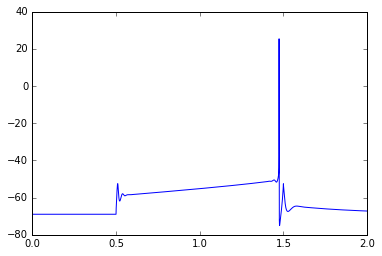

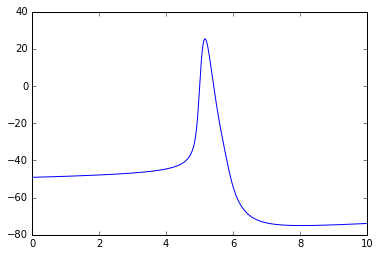

----------
Running Test: Injected current AP amplitude test
Expected: 68.776 mV +/- 50.4271404587 mV SD
Actual: 62.668521303 mV, Z: -0.121114912356 SDs


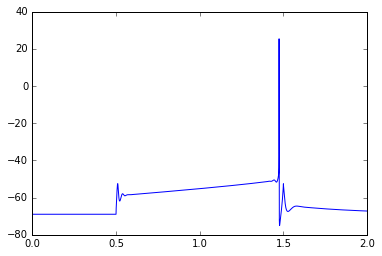

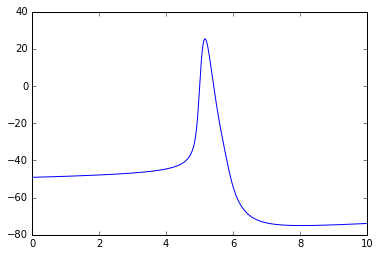

In [6]:
# Initialize the tests and get their expected values
tests = helpers.setupTests(i_rest, i_passive, i_ap, i_thresh, expectedSource = "Pooled")

helpers.runOneTest(tests[0], mod1)

results = helpers.runAllTests(tests,mod1)

In [ ]:
pp(results)
helpers.saveResults(results)
pp(helpers.loadResults())
mod1.h.quit()

{'LiCleland2013': {'Injected current AP amplitude test': array(62.66852130297657) * mV,
                   'Injected current AP threshold test': array(-37.30218823255159) * mV,
                   'Injected current AP width test': array(0.775) * ms,
                   'Input resistance test': array(230686567.79598033) * kg*m**2/(s**3*A**2),
                   'Resting potential test': array(-68.95505511573606) * mV,
                   'Time constant test': array(41.70341199387192) * ms}}
{'BhallaBower1993': {'Injected current AP amplitude test': array(71.32715773727804) * mV,
                     'Injected current AP threshold test': array(-40.35042798167796) * mV,
                     'Injected current AP width test': array(0.5333333333333333) * ms,
                     'Input resistance test': array(51778384.93506186) * kg*m**2/(s**3*A**2),
                     'Resting potential test': array(-65.83856328513072) * mV,
                     'Time constant test': array(43.997403548975335